# Loading Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [ ]:
df.shape

(5000, 14)

In [ ]:
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


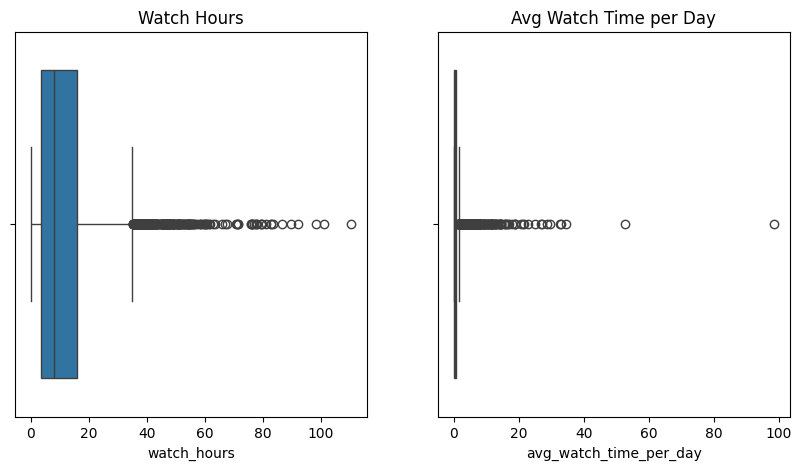

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['watch_hours'])
plt.title("Watch Hours")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['avg_watch_time_per_day'])
plt.title("Avg Watch Time per Day")
plt.show()

# Univariant Analysis

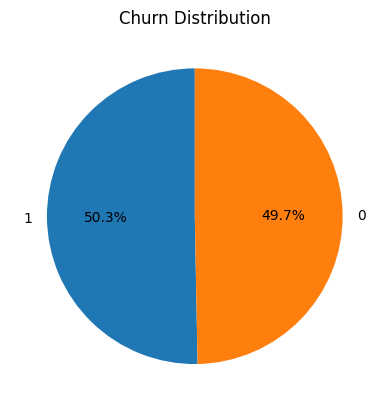

In [ ]:
churn_counts = df['churned'].value_counts()

plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()

In [ ]:
print('Churn Distribution')
df['churned'].value_counts()

Churn Distribution


,count
churned,
1,2515
0,2485


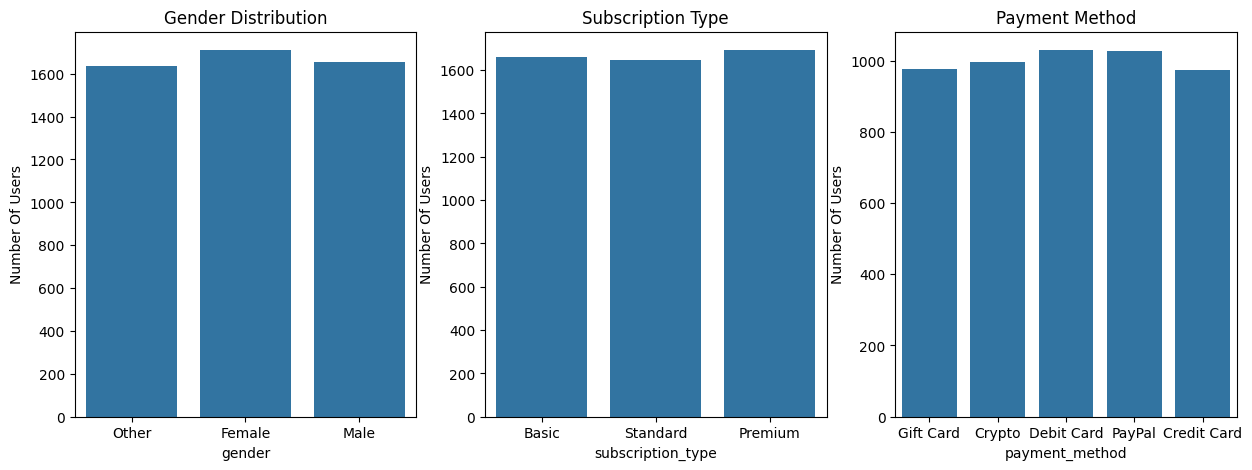

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.countplot(x='gender', data = df)
plt.title('Gender Distribution')
plt.ylabel('Number Of Users')

plt.subplot(1,3,2)
sns.countplot(x='subscription_type', data = df)
plt.title('Subscription Type')
plt.ylabel('Number Of Users')

plt.subplot(1,3,3)
sns.countplot(x='payment_method', data = df)
plt.title('Payment Method')
plt.ylabel('Number Of Users')
plt.show()

<Axes: xlabel='gender', ylabel='watch_hours'>

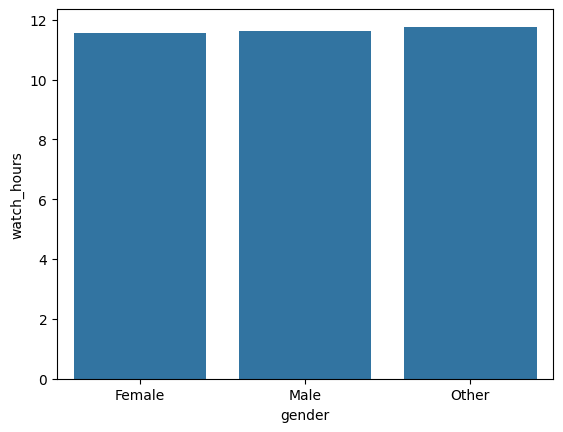

In [ ]:
avg_watch_hour = df.groupby('gender')['watch_hours'].mean().reset_index()
sns.barplot(x='gender', y='watch_hours', data=avg_watch_hour)

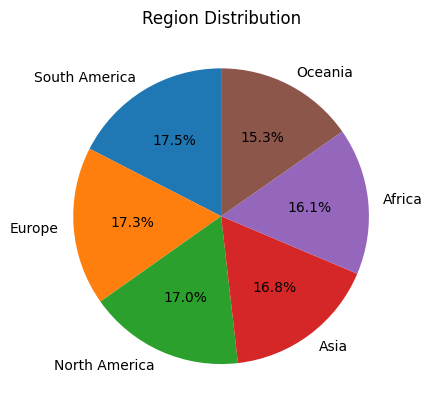

In [ ]:
region_counts = df['region'].value_counts()

plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Region Distribution')
plt.show()

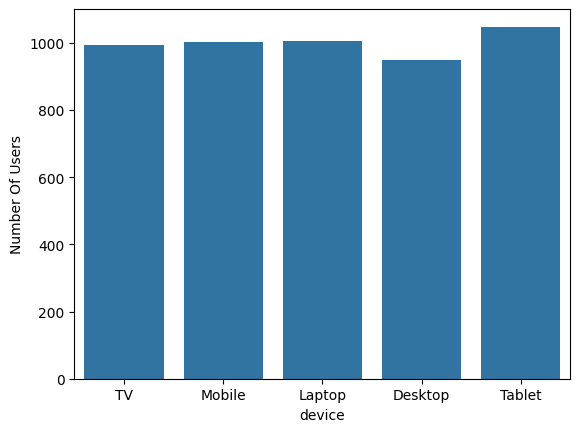

In [ ]:
sns.countplot(x='device', data=df)
plt.ylabel('Number Of Users')
plt.show()

# Bivariant Analysis

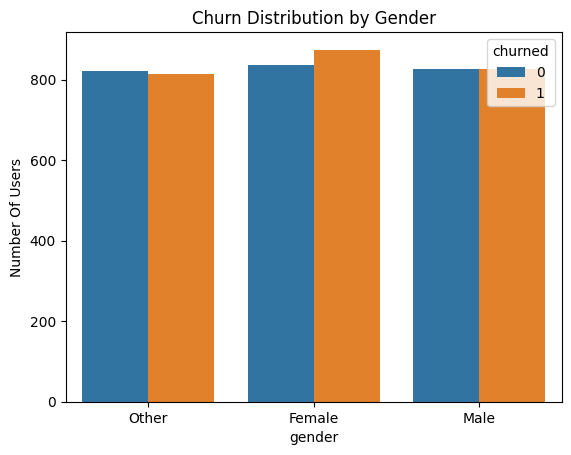

In [ ]:
sns.countplot(x='gender', hue='churned', data = df)
plt.title('Churn Distribution by Gender')
plt.ylabel('Number Of Users')
plt.show()

In [ ]:
print('Avgerage age:',df['age'].mean())

Avgerage age: 43.8474


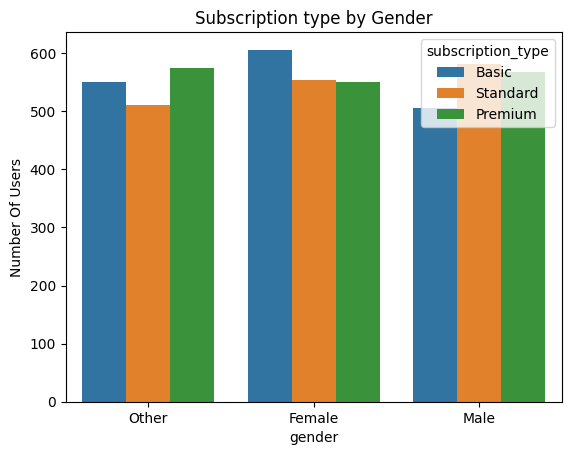

In [ ]:
sns.countplot(x='gender', hue='subscription_type', data = df)
plt.title('Subscription type by Gender')
plt.ylabel('Number Of Users')
plt.show()

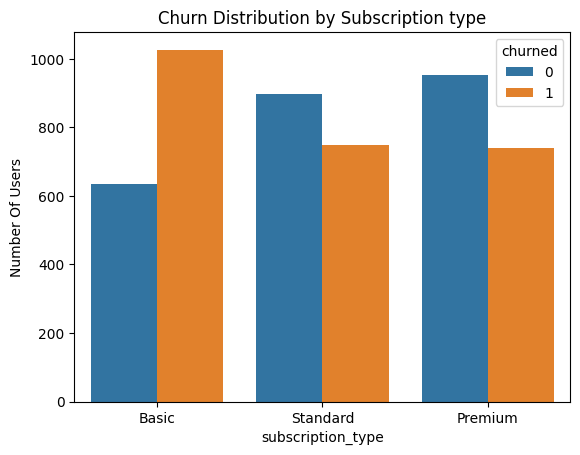

In [ ]:
sns.countplot(x='subscription_type', hue='churned', data =df)
plt.title('Churn Distribution by Subscription type')
plt.ylabel('Number Of Users')
plt.show()

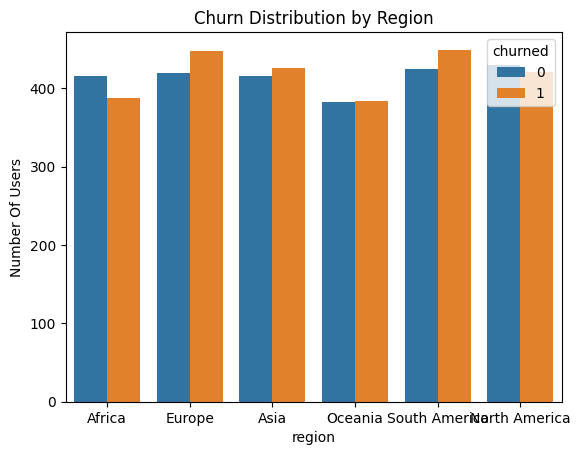

In [ ]:
sns.countplot(x='region', hue='churned', data = df)
plt.title('Churn Distribution by Region')
plt.ylabel('Number Of Users')
plt.show()

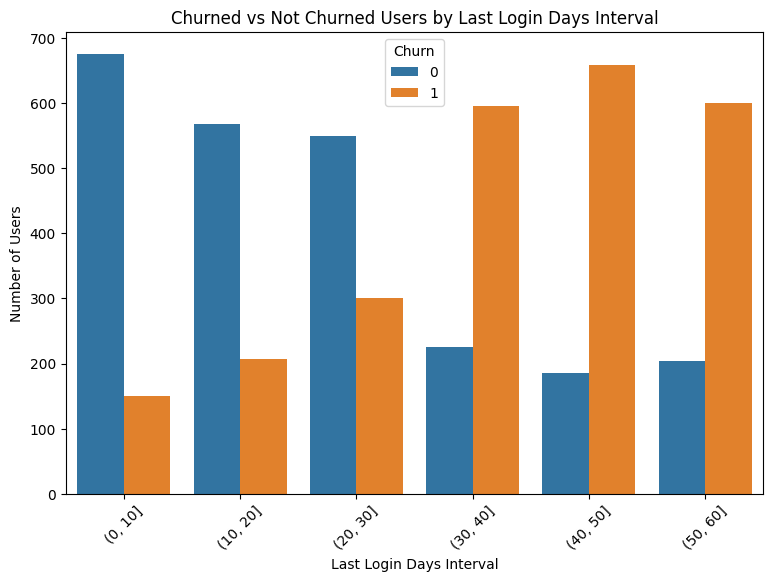

In [ ]:
bins = range(0, 61, 10)
df['login_bin'] = pd.cut(df['last_login_days'], bins=bins)

churn_counts = df.groupby(['login_bin', 'churned'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(9,6))
sns.barplot(x='login_bin', y='count', hue='churned', data=churn_counts)

plt.title("Churned vs Not Churned Users by Last Login Days Interval")
plt.xlabel("Last Login Days Interval")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

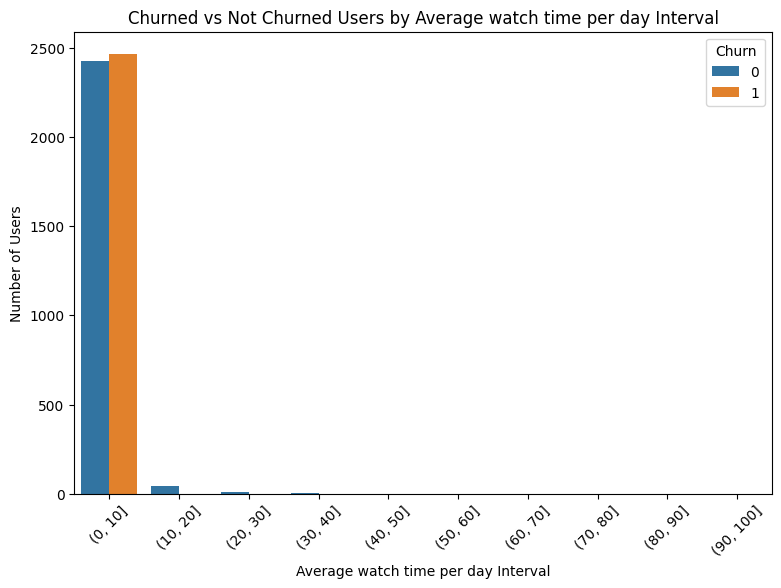

In [ ]:
bins = range(0, 101, 10)
df['login_bin'] = pd.cut(df['avg_watch_time_per_day'], bins=bins)

churn_counts = df.groupby(['login_bin', 'churned'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(9,6))
sns.barplot(x='login_bin', y='count', hue='churned', data=churn_counts)

plt.title("Churned vs Not Churned Users by Average watch time per day Interval")
plt.xlabel("Average watch time per day Interval")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

<Axes: xlabel='number_of_profiles', ylabel='count'>

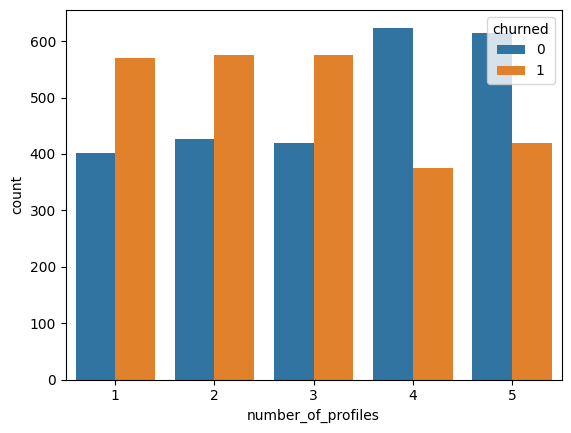

In [ ]:
sns.countplot(x='number_of_profiles', hue='churned', data = df)

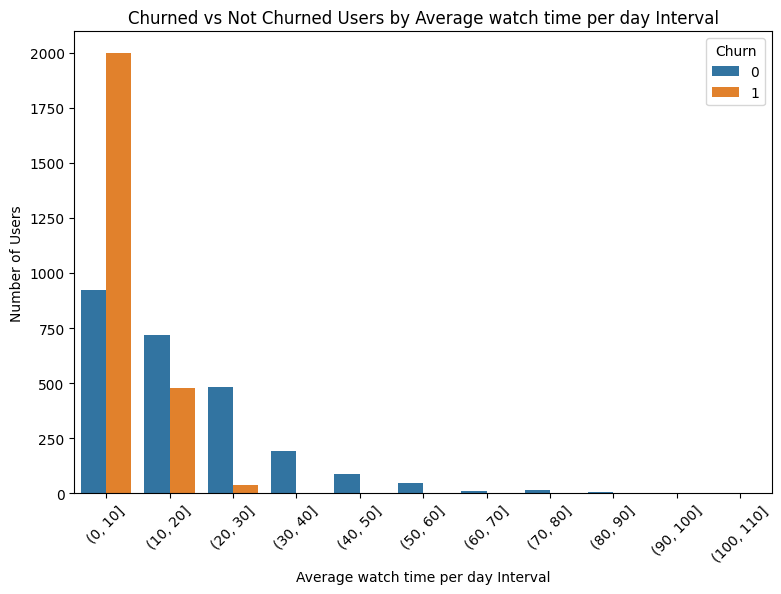

In [ ]:
bins = range(0, 111, 10)
df['login_bin'] = pd.cut(df['watch_hours'], bins=bins)

churn_counts = df.groupby(['login_bin', 'churned'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(9,6))
sns.barplot(x='login_bin', y='count', hue='churned', data=churn_counts)

plt.title("Churned vs Not Churned Users by Average watch time per day Interval")
plt.xlabel("Average watch time per day Interval")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

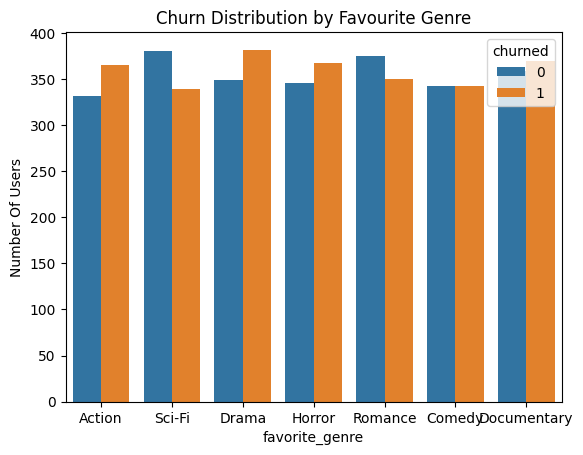

In [ ]:
sns.countplot(x='favorite_genre', hue='churned', data = df)
plt.title('Churn Distribution by Favourite Genre')
plt.ylabel('Number Of Users')
plt.show()

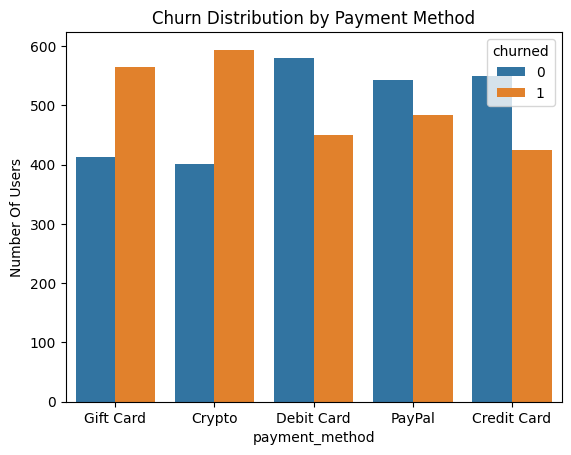

In [ ]:
sns.countplot(x='payment_method', hue='churned', data = df)
plt.title('Churn Distribution by Payment Method')
plt.ylabel('Number Of Users')
plt.show()

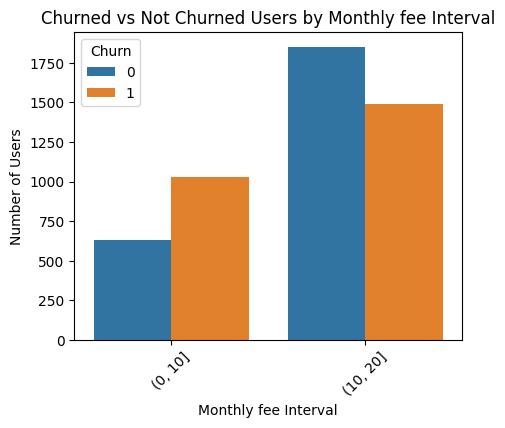

In [ ]:
bins = range(0, 21, 10)
df['login_bin'] = pd.cut(df['monthly_fee'], bins=bins)

churn_counts = df.groupby(['login_bin', 'churned'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(5,4))
sns.barplot(x='login_bin', y='count', hue='churned', data=churn_counts)

plt.title("Churned vs Not Churned Users by Monthly fee Interval")
plt.xlabel("Monthly fee Interval")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

# Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = df.drop(['login_bin','customer_id'], axis=1)

In [ ]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["subscription_type"] = le.fit_transform(df["subscription_type"])
df["region"] = le.fit_transform(df["region"])
df["device"] = le.fit_transform(df["device"])
df["payment_method"] = le.fit_transform(df["payment_method"])
df["favorite_genre"] = le.fit_transform(df["favorite_genre"])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,0.461471,1.241220,-1.225931,0.256425,-0.062152,-1.473389,0.681621,-1.271341,0.994018,0.696005,-1.429965,-0.146895,-1.519717
1,0.203399,1.241220,1.233309,-0.911432,-0.632462,-0.299655,-0.026189,0.083051,0.994018,0.696005,1.395494,-0.322497,1.493004
2,-1.086959,-1.204051,1.233309,0.388777,-1.145741,-0.886522,0.681621,0.083051,-1.006018,-0.720655,-0.723600,0.231031,-0.013356
3,0.590506,1.241220,0.003689,-0.594288,-1.031679,0.874080,0.681621,1.166565,0.994018,-0.720655,-0.723600,-0.200339,0.488764
4,0.784060,1.241220,1.233309,-0.812377,-0.974648,-1.473389,-0.026189,0.083051,0.994018,-0.720655,-0.723600,-0.284322,-1.519717


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [ ]:
X = X_scaled.drop('churned', axis=1)
y= df['churned']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [ ]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (4000, 12)
Test set size: (1000, 12)


In [ ]:
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
Support_Vector_Machine= SVC(probability=True, random_state=42)

In [ ]:
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
Support_Vector_Machine.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
logistic_preds = logistic_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
Support_Vector_preds= Support_Vector_Machine.predict(X_test)

# Models Performance Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, model, model_name):
    print(f"Evaluation for {model_name}:")

    # ROC-AUC Score

    y_probs = model.predict_proba(X_test)[:, 1]
    print("ROC-AUC Score:", roc_auc_score(y_true, y_probs))


    # Classification report
    print("\nClassification Report:\n", classification_report(y_true, y_pred,zero_division=1))
    print("-" * 55)

# Logistic Regression
evaluate_model(y_test, logistic_preds, logistic_model, "Logistic Regression")

# Decision Tree
evaluate_model(y_test, decision_tree_preds, decision_tree_model, "Decision Tree")

# Random Forest
evaluate_model(y_test, random_forest_preds, random_forest_model, "Random Forest")

# Support Vector Machine
evaluate_model(y_test, Support_Vector_preds, Support_Vector_Machine, "Support Vector Machine")

Evaluation for Logistic Regression:
ROC-AUC Score: 0.9578793260692171

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       498
           1       0.87      0.89      0.88       502

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

-------------------------------------------------------
Evaluation for Decision Tree:
ROC-AUC Score: 0.9709715355445687

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       498
           1       0.96      0.98      0.97       502

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

-------------------------------------------------------
Evaluation for Random Forest:
ROC-AUC Score: 0.997

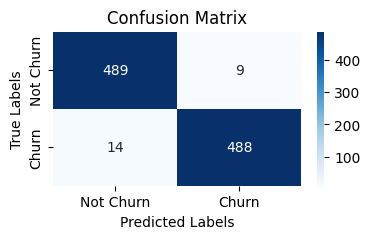

In [ ]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()